# Table of Contents

* [1. Preprocessing, imports and definitions](#1.-Preprocessing,-imports-and-definitions)
* [2. Importing all relevant csvs as dfs](#2.-Importing-all-relevant-csvs-as-dfs)

* [3. Pro Data](#3.-Pro-Data)
    * [3.1. Lexicon or rule based classification](#3.1.-Lexicon-or-rule-based-classification)
    * [3.2. Visualise data](#3.2.-Visualise-data)
    * [3.3. Machine Learning](#3.3.-Machine-Learning)
        * [3.3.1. Tokenise](#3.3.1.-Tokenise)
        * [3.3.2. Lemmatise](#3.3.2.-Lemmatise)
    * [3.4. Removing Stop Words](#3.4.-Removing-Stop-Words)
        * [3.4.1. Negative Word Cloud without stop words](#3.4.1.-Negative-Word-Cloud-without-stop-words)
        * [3.4.2. Positive Word Cloud without stop words](#3.4.2.-Positive-Word-Cloud-without-stop-words)
    * [3.5. Count Vectorisation](#3.5.-Count-Vectorisation)
    * [3.6. TFIDF](#3.6.-TFIDF)
    * [3.7. TFIDF Support Vector Machine](#3.7.-TFIDF-Support-Vector-Machine)
        * [3.7.1. Training](#3.7.1.-Training)
        * [3.7.2. Pro Data Set ML](#3.7.2.-Pro-Data-Set-ML)
    * [3.8. Data Analysis](#3.8.-Data-Analysis)
    
* [4. Anti Data](#4.-Anti-Data)
    * [4.1. Lexicon-based Sentiment Analysis](#4.1.-Lexicon-based-Sentiment-Analysis)
    * [4.2 Visualise Data](#4.2.-Visualise-Data)
    * [4.3. Machine Learning](#4.3.-Machine-Learning)
        * [4.3.1. Tokenise](#4.3.1.-Tokenise)
        * [4.3.2 Lemmatise](#4.3.2.-Lemmatise)
    * [4.4. Removing Stop Words](#4.4.-Removing-Stop-Words)
        * [4.4.1. Negative Word Cloud without stop words](#4.4.1.-Negative-Word-Cloud-without-stop-words)
        * [4.4.2. Positive Word Cloud without stop words](#4.4.2.-Positive-Word-Cloud-without-stop-words)
    * [4.5. Count Vectorisation](#4.6.-Count-Vectorisation)
    * [4.6. TFIDF](##4.8.-TFIDF)
    * [4.7. TFIDF Support Vector Machine](#4.7.-TFIDF-Support-Vector-Machine)
        * [4.7.1. Training](#4.7.1.-Training)
        * [4.7.2. Anti Data Set ML](#4.7.2.-Anti-Data-Set-ML)
    * [4.8. Data Analysis](#4.8.-Data-Analysis)
    
* [5. Hypothesis Tests](#5.-Hypothesis-Tests)
    * [5.1. Pro-BLM Data](#5.1.-Pro-BLM-Data)
    * [5.2. Anti-BLM Data](#5.2.-Anti-BLM-Data) 
    * [5.3. All Data](#5.3.-All-Data) 



In [149]:
import pandas as pd
import re
import numpy as np
import pandas as pd
import typing

#vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# plotting
import seaborn as sns
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

#stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency

In [2]:
pip install vaderSentiment


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# 1. Preprocessing, imports and definitions

In [3]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

# Importing stopword list
stopwordlist: typing.List = stopwords.words('english')

In [4]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
#         # Replace all emojis.
#         for emoji in emojis.keys():
#             tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

# 2. Importing all relevant csvs as dfs

In [5]:
fullprodf1 = pd.read_csv('BLMpolicelineup_short.csv')

prodf1 = fullprodf1[['Comment Text']]

In [6]:
fullprodf2 = pd.read_csv('BLMamericaprotest_short.csv')

prodf2 = fullprodf2[['Comment Text']] 

In [7]:
fullprodf3 = pd.read_csv('BLMphotos_short.csv')

prodf3 = fullprodf3[['Comment Text']]

In [8]:
procsv = ['BLMpolicelineup_short.csv', 'BLMamericaprotest_short.csv', 'BLMphotos_short.csv']

In [9]:
fullprodfs = [pd.read_csv(file) for file in procsv]

fullprodfs = pd.concat(fullprodfs, ignore_index = True) 


In [10]:
prodfs = fullprodfs[['Comment Text']]

In [11]:
fullantidf1 = pd.read_csv('ALM_hands_short.csv')

antidf1 = fullantidf1[['Comment Text']]

In [12]:
fullantidf2 = pd.read_csv('ALM_soundslike_short.csv')

antidf2 = fullantidf2[['Comment Text']]

In [13]:
fullantidf3 = pd.read_csv('ALM_whitehelp_short.csv')

antidf3 = fullantidf3[['Comment Text']]

In [14]:
anticsv = ['ALM_hands_short.csv', 'ALM_soundslike_short.csv', 'ALM_whitehelp_short.csv']

In [15]:
fullantidfs = [pd.read_csv(file) for file in anticsv]

fullantidfs = pd.concat(fullantidfs, ignore_index = True) 


In [16]:
antidfs = fullantidfs[['Comment Text']]

# 3. Pro Data

## 3.1. Lexicon or rule based classification

In [17]:
protext = preprocess(prodfs['Comment Text'])

In [18]:
analyzer = SentimentIntensityAnalyzer()
for text in protext:
    vs = analyzer.polarity_scores(text)
    print("{:-<65} {}".format(text, str(vs)))
    

to the person reading this your life matter you are so valued no one can replace you love and thankful you were born  {'neg': 0.075, 'neu': 0.542, 'pos': 0.384, 'compound': 0.8824}
you too you are great person for doing that --------------------- {'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.6249}
norbeto --------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
black live matter ----------------------------------------------- {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.0258}
feel like 2020 is going to be documentary ----------------------- {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.3612}
they goin start movie like dont ever try this at home or in another year  {'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.3612}
lol xd whoever learns abput 2020 is gonna have the best history xd  {'neg': 0.0, 'neu': 0.381, 'pos': 0.619, 'compound': 0.9393}
step dont eat bat ------------------------------------

back the blue --------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
because they protect u from criminal ---------------------------- {'neg': 0.34, 'neu': 0.4, 'pos': 0.26, 'compound': -0.2023}
nope ------------------------------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
your word dont match your profile photo ------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
bro is in zoo --------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
----------------------------------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
bro this is funny ----------------------------------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
walking --------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
black and white life matter

In [19]:
analyzer = SentimentIntensityAnalyzer()
prodfs['rating'] = prodfs['Comment Text'].apply(analyzer.polarity_scores)
prodfs = pd.concat([prodfs.drop(['rating'], axis=1), prodfs['rating'].apply(pd.Series)], axis=1)

/var/folders/rp/80j2vjnj37b7zlm3jfy9t03w0000gn/T/ipykernel_5633/300440163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prodfs['rating'] = prodfs['Comment Text'].apply(analyzer.polarity_scores)


In [20]:
sentiment = []
for sentence in prodfs['Comment Text']:
    
    sid_obj = SentimentIntensityAnalyzer()
    
    sentiment_dict = sid_obj.polarity_scores(sentence)
    
     # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        
        sentiment.append('Positive')
 
    elif sentiment_dict['compound'] <= - 0.05 :
         sentiment.append('Negative')
 
    else :
         sentiment.append('Neutral')

In [21]:
prodfs['sentiment'] = sentiment

In [22]:
prodfs

,Comment Text,neg,neu,pos,compound,sentiment
0,To the person reading this: Your life matters....,0.068,0.580,0.352,0.8824,Positive
1,You too you are a great person for doing that,0.000,0.687,0.313,0.6249,Positive
2,NORBETO?,0.000,1.000,0.000,0.0000,Neutral
3,black live's matter,0.000,0.645,0.355,0.0258,Neutral
4,i feel like 2020 is going to be a documentary,0.000,0.783,0.217,0.3612,Positive
...,...,...,...,...,...,...
3376,👮🏼‍♂️This is Derek Chauvin\n👕 He killed George...,0.261,0.647,0.091,-0.8442,Negative
3377,Me encanto ✊✊🏻✊🏼✊🏽✊🏾✊🏿,0.000,1.000,0.000,0.0000,Neutral
3378,😍❤️❤️❤️,0.000,0.750,0.250,0.4588,Positive
3379,✊𝚆𝙴✊🏻𝙰𝚁𝙴✊🏽𝚃𝙷𝙴✊🏾𝚂𝙰𝙼𝙴✊🏿,0.000,1.000,0.000,0.0000,Neutral


In [23]:
sentprodfs = prodfs[['Comment Text', 'sentiment']]

In [24]:
sentprodfs

,Comment Text,sentiment
0,To the person reading this: Your life matters....,Positive
1,You too you are a great person for doing that,Positive
2,NORBETO?,Neutral
3,black live's matter,Neutral
4,i feel like 2020 is going to be a documentary,Positive
...,...,...
3376,👮🏼‍♂️This is Derek Chauvin\n👕 He killed George...,Negative
3377,Me encanto ✊✊🏻✊🏼✊🏽✊🏾✊🏿,Neutral
3378,😍❤️❤️❤️,Positive
3379,✊𝚆𝙴✊🏻𝙰𝚁𝙴✊🏽𝚃𝙷𝙴✊🏾𝚂𝙰𝙼𝙴✊🏿,Neutral


## 3.2. Visualise data

In [25]:
def print_top_n_reviews(df,data_column,number_of_rows):
    for index,row in df.nlargest(number_of_rows,data_column).iterrows():
        print(f"Score: {row[data_column]}, Review: {row[0]}")

In [26]:
print_top_n_reviews(prodfs, 'pos', 10)

Score: 1.0, Review: Yes
Score: 1.0, Review: Yeah
Score: 1.0, Review: yes
Score: 1.0, Review: LMFAO-
Score: 1.0, Review: Okay.
Score: 1.0, Review: ha funny
Score: 1.0, Review: Great*
Score: 1.0, Review: agreeing
Score: 1.0, Review: TRUE
Score: 1.0, Review: Yeah


In [27]:
print_top_n_reviews(prodfs, 'neg', 10)

Score: 1.0, Review: No
Score: 1.0, Review: hell no
Score: 1.0, Review: seriously?!?!?!
Score: 1.0, Review: Nah
Score: 1.0, Review: no
Score: 1.0, Review: no
Score: 1.0, Review: no
Score: 1.0, Review: No
Score: 1.0, Review: No
Score: 1.0, Review: No


## 3.3. Machine Learning

In [28]:
def clean_tweets(text):
    import string 
    from string import digits
    remove_digits = str.maketrans('', '', digits)
    text=text.translate(str.maketrans('', '', string.punctuation))#removing all ponctuations
    text =text.translate(remove_digits)
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub("@[\w]*","",text)# removed @mention
    
    
    text=re.sub("[^\w\s#@/:%.,_-]", "", text, flags=re.UNICODE)#remove emoji
    
    text = text.replace('x', '')
    text=re.sub(r'https?:\/\/\s+','',text)#remove the hyper link
    text=re.sub("http\\w+", "",text)
    
    #text = re.sub("https?://[A-Za-z0-9./]*","",text)
    
    text=re.sub(r'^[A-Za-z0-9.!?]+'," ",text) ##Removing digits and punctuations
    text=re.sub(r'#','',text)# removing hashtag
    text=re.sub(r' +'," ",text)
    text = re.sub("\n","",text)
    text = text.lower()

    
    text = re.sub("^\\s+|\\s+$", "", text)  # Remove leading and trailing white space
    
    return text




In [29]:
sentprodfs['Comment Text'] = sentprodfs['Comment Text'].apply(clean_tweets)

/var/folders/rp/80j2vjnj37b7zlm3jfy9t03w0000gn/T/ipykernel_5633/3326386542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentprodfs['Comment Text'] = sentprodfs['Comment Text'].apply(clean_tweets)


### 3.3.1. Tokenise

In [30]:
sentences=[]
words=[]
for i in range(0,sentprodfs.shape[0]):
    sentences.extend(nltk.sent_tokenize(sentprodfs['Comment Text'][i]))
    words.extend(nltk.word_tokenize(sentprodfs['Comment Text'][i]))
    

In [31]:
for i in range(0,len(sentences)):
    words=nltk.word_tokenize(sentences[i])

In [32]:
sentences = sentprodfs.iloc[0]
sentences['Comment Text']

'the person reading this your life matters you are so valued no one can replace youi love uand im thankful you were born'

In [34]:
def identify_tokens(words):
    
    words=words['Comment Text']
    tokens = nltk.word_tokenize(words)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

In [35]:
sentprodfs['words'] = sentprodfs.apply(identify_tokens, axis=1)

/var/folders/rp/80j2vjnj37b7zlm3jfy9t03w0000gn/T/ipykernel_5633/2053772698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentprodfs['words'] = sentprodfs.apply(identify_tokens, axis=1)


In [36]:
def identify_tokens(sentences):
    
    sentences=sentences['Comment Text']
    tokens = nltk.sent_tokenize(sentences)
    
    return tokens

In [37]:
sentprodfs['sentences'] = sentprodfs.apply(identify_tokens, axis=1)

/var/folders/rp/80j2vjnj37b7zlm3jfy9t03w0000gn/T/ipykernel_5633/2586402486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentprodfs['sentences'] = sentprodfs.apply(identify_tokens, axis=1)


In [38]:
#convert list of sentences to string
def convert_list_to_string(text, seperator=' '):
    
    return seperator.join(text)

In [39]:
sentprodfs['sentences']=sentprodfs['sentences'].apply(convert_list_to_string)

/var/folders/rp/80j2vjnj37b7zlm3jfy9t03w0000gn/T/ipykernel_5633/2790892772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentprodfs['sentences']=sentprodfs['sentences'].apply(convert_list_to_string)


In [40]:
sentprodfs

,Comment Text,sentiment,words,sentences
0,the person reading this your life matters you ...,Positive,"[the, person, reading, this, your, life, matte...",the person reading this your life matters you ...
1,too you are a great person for doing that,Positive,"[too, you, are, a, great, person, for, doing, ...",too you are a great person for doing that
2,,Neutral,[],
3,lives matter,Neutral,"[lives, matter]",lives matter
4,feel like is going to be a documentary,Positive,"[feel, like, is, going, to, be, a, documentary]",feel like is going to be a documentary
...,...,...,...,...
3376,is derek chauvin he killed george floydeach li...,Negative,"[is, derek, chauvin, he, killed, george, floyd...",is derek chauvin he killed george floydeach li...
3377,encanto,Neutral,[encanto],encanto
3378,,Positive,[],
3379,𝚆𝙴𝙰𝚁𝙴𝚃𝙷𝙴𝚂𝙰𝙼𝙴,Neutral,[𝚆𝙴𝙰𝚁𝙴𝚃𝙷𝙴𝚂𝙰𝙼𝙴],𝚆𝙴𝙰𝚁𝙴𝚃𝙷𝙴𝚂𝙰𝙼𝙴


### 3.3.2. Lemmatise

In [41]:
w_tokenizer=nltk.tokenize.WhitespaceTokenizer()
lemmatizer=nltk.stem.WordNetLemmatizer()

In [42]:
def lemmatize_text(text):
    
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [43]:
sentprodfs['lemmatizer_tweets']=sentprodfs['sentences'].apply(lemmatize_text)

/var/folders/rp/80j2vjnj37b7zlm3jfy9t03w0000gn/T/ipykernel_5633/1163838973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentprodfs['lemmatizer_tweets']=sentprodfs['sentences'].apply(lemmatize_text)


## 3.4. Removing stop words

In [44]:
nltk.download('words')

stop = stopwords.words('english')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     /Users/tarateylouni/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [45]:
sentprodfs['clean_comments']=sentprodfs['Comment Text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))


### 3.4.1. Negative Word Cloud without stop words

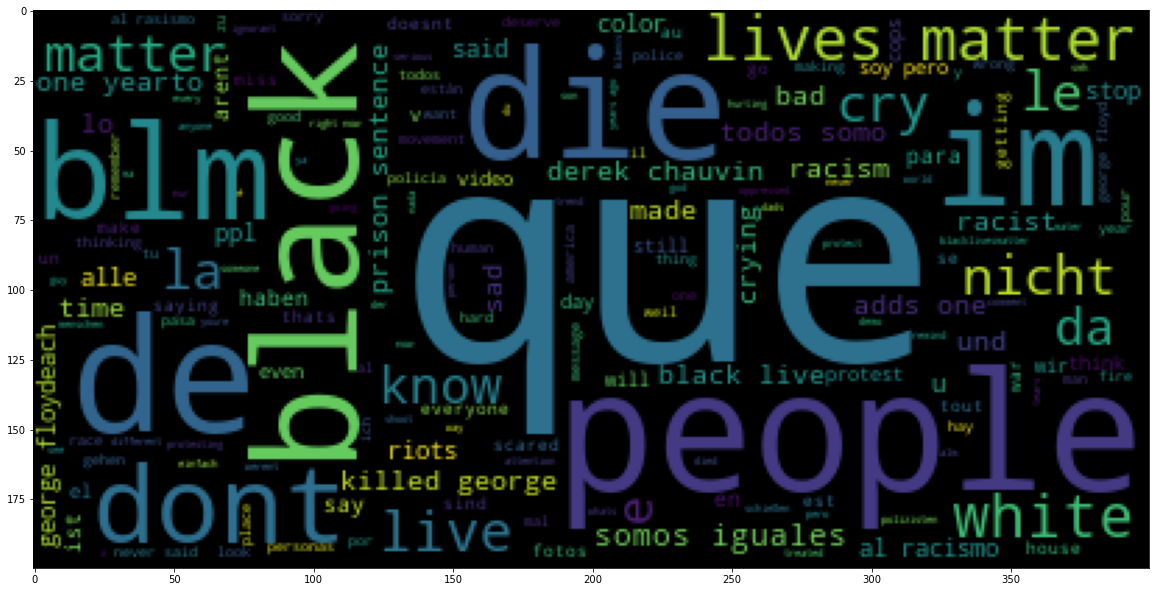

In [46]:
Negative=sentprodfs[sentprodfs['sentiment']=='Negative']
Negative_list = Negative['Comment Text'].to_list()
Negative_words=" ".join(Negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(Negative_words))

### 3.4.2. Positive Word Cloud without stop words

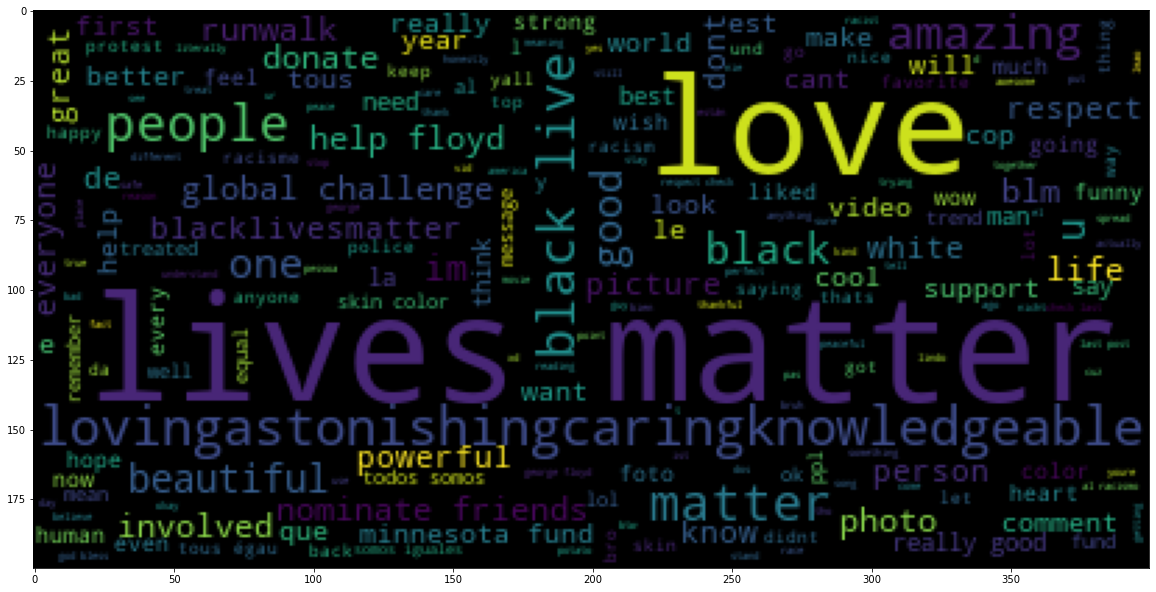

In [47]:
Positive=sentprodfs[sentprodfs['sentiment']=='Positive']
Positive_list=Positive['Comment Text'].to_list()
Positive_words=" ".join(Positive_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(Positive_words))

## 3.5. Count vectorisation

In [48]:
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(sentprodfs['clean_comments'])

#print(vectorizer.get_feature_names())

In [49]:
y=sentprodfs['sentiment']
y.shape

(3381,)

## 3.6. TFIDF

In [50]:
tfidfpro = sentprodfs.copy()

In [51]:
conditions = [
    sentprodfs.sentiment == 'Positive',
    sentprodfs.sentiment == 'Neutral',
    sentprodfs.sentiment <= 'Negative',
]

values = [0, 1, 2]

tfidfpro['label'] = np.select(conditions, values)

In [52]:
tfidf_X_train, tfidf_X_test, tfidf_Y_train, tfidf_Y_test = train_test_split(tfidfpro['clean_comments'], tfidfpro['label'], test_size=0.25, random_state=30)
print('Train: ', tfidf_X_train.shape, tfidf_Y_train.shape, 'Test: ',(tfidf_X_test.shape, tfidf_Y_test.shape))


Train:  (2535,) (2535,) Test:  ((846,), (846,))


In [53]:
print('TFIDF Vectorizer……')

vectorizer= TfidfVectorizer()
tfidf_x_train = vectorizer.fit_transform(tfidf_X_train)
tfidf_x_test = vectorizer.transform(tfidf_X_test)

TFIDF Vectorizer……


## 3.7. TFIDF Support Vector Machine

### 3.7.1. Training

In [54]:
tfidfSVM_clf = LinearSVC(random_state=0)

In [55]:
tfidfSVM_clf.fit(tfidf_x_train,tfidf_Y_train)

LinearSVC(random_state=0)

In [56]:
tfidfSVM_y_test_pred=tfidfSVM_clf.predict(tfidf_x_test)

In [57]:
len(tfidfSVM_y_test_pred)

846

In [58]:
tfidfSVM_report=classification_report(tfidf_Y_test, tfidfSVM_y_test_pred, output_dict=True)

In [59]:
tfidfSVM_cm = confusion_matrix(tfidf_Y_test, tfidfSVM_y_test_pred)

Text(33.0, 0.5, 'Data')

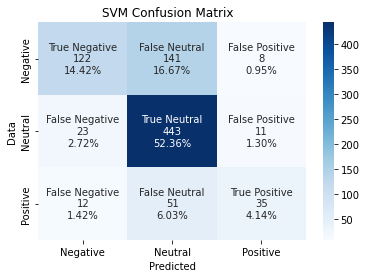

In [60]:
group_names = ["True Negative","False Neutral","False Positive","False Negative","True Neutral","False Positive","False Negative","False Neutral","True Positive"]

group_counts = ["{0:0.0f}".format(value) for value in
                tfidfSVM_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     tfidfSVM_cm.flatten()/np.sum(tfidfSVM_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
ax= plt.subplot()
ax.set_title('SVM Confusion Matrix  ');
sns.heatmap(tfidfSVM_cm, annot=labels,ax=ax, fmt='', cmap='Blues')

ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive']); ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive']);

plt.xlabel('Predicted')
plt.ylabel('Data')

In [61]:
target_names=['Negative','Neutral' ,'Positive']
tfidfSVM_Classification_report = classification_report(tfidf_Y_test, tfidfSVM_y_test_pred, target_names=target_names)

print(tfidfSVM_Classification_report)

              precision    recall  f1-score   support

    Negative       0.78      0.45      0.57       271
     Neutral       0.70      0.93      0.80       477
    Positive       0.65      0.36      0.46        98

    accuracy                           0.71       846
   macro avg       0.71      0.58      0.61       846
weighted avg       0.72      0.71      0.69       846



In [62]:
tfidfSVM_accuracy = (accuracy_score(tfidf_Y_test,tfidfSVM_y_test_pred)*100)

In [63]:
print('ACCURACY',int(round(accuracy_score(tfidf_Y_test,tfidfSVM_y_test_pred)*100)),'%')


ACCURACY 71 %


### 3.7.2. Pro Data Set ML

In [64]:
X = tfidfpro['clean_comments']

In [65]:
y = tfidfpro['label']

In [66]:
vectorizer.fit(X)
x = vectorizer.transform(X)

In [67]:
tfidfSVM_clf = LinearSVC(random_state=0)

In [68]:
tfidfSVM_clf.fit(x,y)

LinearSVC(random_state=0)

In [69]:
tfidfSVM_y_test_pred=tfidfSVM_clf.predict(x)

In [70]:
len(tfidfSVM_y_test_pred)

3381

In [71]:
tfidfSVM_y_test_pred

array([0, 0, 1, ..., 1, 1, 1])

In [72]:
tfidfpro['sent_2']=tfidfSVM_y_test_pred

In [73]:
proBLMdf = tfidfpro[['sentiment', 'sent_2']]

## 3.8. Data Analysis

In [74]:
proBLMdf.dropna()

,sentiment,sent_2
0,Positive,0
1,Positive,0
2,Neutral,1
3,Neutral,1
4,Positive,0
...,...,...
3376,Negative,2
3377,Neutral,1
3378,Positive,1
3379,Neutral,1


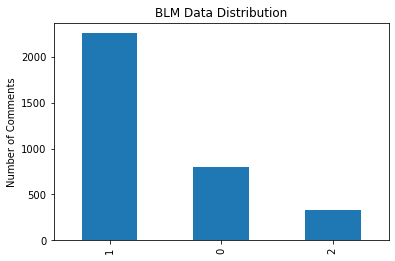

In [75]:
proBLMdf['sent_2'].value_counts().plot(kind='bar')
plt.ylabel('Number of Comments')
plt.title('BLM Data Distribution')
plt.show()

In [76]:
proBLMdf['sent_2'].value_counts()

1    2253
0     794
2     334
Name: sent_2, dtype: int64

In [1]:
# Pro BLM Data Distribution of Vader labelled data

proBLMdf['sentiment'].value_counts().plot(kind='bar')
plt.ylabel('Number of Comments')
plt.title('BLM Data Distribution')
plt.show()

NameError: name 'proBLMdf' is not defined

In [78]:
proBLMdf['sentiment'].value_counts()

Neutral     1908
Positive    1074
Negative     399
Name: sentiment, dtype: int64

In [79]:
sum(fullantidfs['Number of Replies'])

2350

# 4. Anti Data

## 4.1. Lexicon-based Sentiment Analysis

In [80]:
antitext = preprocess(antidfs['Comment Text'])

In [81]:
analyzer = SentimentIntensityAnalyzer()
for text in antitext:
    vs = analyzer.polarity_scores(text)
    print("{:-<65} {}".format(text, str(vs)))
    

so all life matter ---------------------------------------------- {'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.0935}
no they aren ---------------------------------------------------- {'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.296}
exactly that what blm is about why doe no one get that ---------- {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.296}
yea they -------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
yeah like it not black life matter it black life matter --------- {'neg': 0.077, 'neu': 0.505, 'pos': 0.418, 'compound': 0.5756}
yes they are ---------------------------------------------------- {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.4019}
more people race are a well it not just black ------------------- {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.2732}
not only black -------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0

if you don agree with alm your racist because you don care about other race  {'neg': 0.184, 'neu': 0.553, 'pos': 0.263, 'compound': 0.1779}
so you think white people don get hate -------------------------- {'neg': 0.346, 'neu': 0.654, 'pos': 0.0, 'compound': -0.5719}
with whatever trend you gotta be fucking kidding right the only fucking person saying different opinion in these comment and you re not  {'neg': 0.0, 'neu': 0.929, 'pos': 0.071, 'compound': 0.1761}
bruh literally every race is now getting movement so we might a well just say all life and make big one  {'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'compound': 0.2732}
white get plenty of hate bro ------------------------------------ {'neg': 0.425, 'neu': 0.575, 'pos': 0.0, 'compound': -0.5719}
it bc there black ----------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
if blm mattered so much to poc they should stop shooting eachother looting store during blm protest burning horse and tr

weil in amerika die polizei gewalt gr tenteils gegen dunkelh utige ausge bt wurde  {'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.5994}
hmm nicht falsch ------------------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ya -------------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
no -------------------------------------------------------------- {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.296}
alm ------------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
yo -------------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
nlm ------------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
alm ------------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
blm alm ----

In [82]:
analyzer = SentimentIntensityAnalyzer()
antidfs['rating'] = antidfs['Comment Text'].apply(analyzer.polarity_scores)
antidfs = pd.concat([antidfs.drop(['rating'], axis=1), antidfs['rating'].apply(pd.Series)], axis=1)

/var/folders/rp/80j2vjnj37b7zlm3jfy9t03w0000gn/T/ipykernel_5633/3464007795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  antidfs['rating'] = antidfs['Comment Text'].apply(analyzer.polarity_scores)


In [83]:
sentiment = []
for sentence in antidfs['Comment Text']:
    
    sid_obj = SentimentIntensityAnalyzer()
    
    sentiment_dict = sid_obj.polarity_scores(sentence)
    
     # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        
        sentiment.append('Positive')
 
    elif sentiment_dict['compound'] <= - 0.05 :
         sentiment.append('Negative')
 
    else :
         sentiment.append('Neutral')

In [84]:
antidfs['sentiment'] = sentiment

In [85]:
sentantidfs = antidfs[['Comment Text', 'sentiment']]

## 4.2. Visualise Data

In [87]:
print_top_n_reviews(antidfs, 'pos', 10)

Score: 1.0, Review: yes
Score: 1.0, Review: yeah
Score: 1.0, Review: Yes
Score: 1.0, Review: Yes
Score: 1.0, Review: Yes
Score: 1.0, Review: Cool
Score: 1.0, Review: yes :)
Score: 1.0, Review: lol
Score: 1.0, Review: Yes
Score: 1.0, Review: Yes


In [88]:
print_top_n_reviews(antidfs, 'neg', 10)

Score: 1.0, Review: No
Score: 1.0, Review: no
Score: 1.0, Review: No
Score: 1.0, Review: No
Score: 1.0, Review: no
Score: 1.0, Review: No
Score: 1.0, Review: no
Score: 1.0, Review: no
Score: 1.0, Review: No
Score: 1.0, Review: Mad


## 4.3. Machine Learning

In [90]:
sentantidfs['Comment Text'] = sentantidfs['Comment Text'].apply(clean_tweets)

/var/folders/rp/80j2vjnj37b7zlm3jfy9t03w0000gn/T/ipykernel_5633/93130251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentantidfs['Comment Text'] = sentantidfs['Comment Text'].apply(clean_tweets)


### 4.3.1. Tokenise

In [91]:
sentences=[]
words=[]
for i in range(0,sentantidfs.shape[0]):
    sentences.extend(nltk.sent_tokenize(sentantidfs['Comment Text'][i]))
    words.extend(nltk.word_tokenize(sentantidfs['Comment Text'][i]))
    

In [92]:
for i in range(0,len(sentences)):
    words=nltk.word_tokenize(sentences[i])

In [93]:
sentences = sentantidfs.iloc[0]
sentences['Comment Text']

'all lives matter'

In [96]:
sentantidfs['words'] = sentantidfs.apply(identify_tokens, axis=1)

/var/folders/rp/80j2vjnj37b7zlm3jfy9t03w0000gn/T/ipykernel_5633/2897757554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentantidfs['words'] = sentantidfs.apply(identify_tokens, axis=1)


In [98]:
sentantidfs['sentences'] = sentantidfs.apply(identify_tokens, axis=1)

/var/folders/rp/80j2vjnj37b7zlm3jfy9t03w0000gn/T/ipykernel_5633/1230993990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentantidfs['sentences'] = sentantidfs.apply(identify_tokens, axis=1)


In [100]:
sentantidfs['sentences']=sentantidfs['sentences'].apply(convert_list_to_string)

/var/folders/rp/80j2vjnj37b7zlm3jfy9t03w0000gn/T/ipykernel_5633/4276071195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentantidfs['sentences']=sentantidfs['sentences'].apply(convert_list_to_string)


In [101]:
sentantidfs

,Comment Text,sentiment,words,sentences
0,all lives matter,Positive,"[all, lives, matter]",all lives matter
1,they arent,Negative,"[they, arent]",they arent
2,thats what blm is about why does no one get that,Negative,"[thats, what, blm, is, about, why, does, no, o...",thats what blm is about why does no one get that
3,they r,Neutral,"[they, r]",they r
4,like its not black lives matter its black live...,Positive,"[like, its, not, black, lives, matter, its, bl...",like its not black lives matter its black live...
...,...,...,...,...
4238,youre right a bunch of white guys did fight fo...,Positive,"[youre, right, a, bunch, of, white, guys, did,...",youre right a bunch of white guys did fight fo...
4239,if it wouldnt have been for white mengood men ...,Positive,"[if, it, wouldnt, have, been, for, white, meng...",if it wouldnt have been for white mengood men ...
4240,can handle thismama didnt raise a whiner but t...,Positive,"[can, handle, thismama, didnt, raise, a, whine...",can handle thismama didnt raise a whiner but t...
4241,you much appreciated,Positive,"[you, much, appreciated]",you much appreciated


### 4.3.2. Lemmatise

In [102]:
w_tokenizer=nltk.tokenize.WhitespaceTokenizer()
lemmatizer=nltk.stem.WordNetLemmatizer()

In [104]:
sentantidfs['lemmatizer_tweets']=sentantidfs['sentences'].apply(lemmatize_text)

/var/folders/rp/80j2vjnj37b7zlm3jfy9t03w0000gn/T/ipykernel_5633/3471925774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentantidfs['lemmatizer_tweets']=sentantidfs['sentences'].apply(lemmatize_text)


In [105]:
sentantidfs

,Comment Text,sentiment,words,sentences,lemmatizer_tweets
0,all lives matter,Positive,"[all, lives, matter]",all lives matter,"[all, life, matter]"
1,they arent,Negative,"[they, arent]",they arent,"[they, arent]"
2,thats what blm is about why does no one get that,Negative,"[thats, what, blm, is, about, why, does, no, o...",thats what blm is about why does no one get that,"[thats, what, blm, is, about, why, doe, no, on..."
3,they r,Neutral,"[they, r]",they r,"[they, r]"
4,like its not black lives matter its black live...,Positive,"[like, its, not, black, lives, matter, its, bl...",like its not black lives matter its black live...,"[like, it, not, black, life, matter, it, black..."
...,...,...,...,...,...
4238,youre right a bunch of white guys did fight fo...,Positive,"[youre, right, a, bunch, of, white, guys, did,...",youre right a bunch of white guys did fight fo...,"[youre, right, a, bunch, of, white, guy, did, ..."
4239,if it wouldnt have been for white mengood men ...,Positive,"[if, it, wouldnt, have, been, for, white, meng...",if it wouldnt have been for white mengood men ...,"[if, it, wouldnt, have, been, for, white, meng..."
4240,can handle thismama didnt raise a whiner but t...,Positive,"[can, handle, thismama, didnt, raise, a, whine...",can handle thismama didnt raise a whiner but t...,"[can, handle, thismama, didnt, raise, a, whine..."
4241,you much appreciated,Positive,"[you, much, appreciated]",you much appreciated,"[you, much, appreciated]"


## 4.4. Removing stop words

In [106]:
nltk.download('words')

stop = stopwords.words('english')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     /Users/tarateylouni/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [107]:
sentantidfs['clean_comments']=sentantidfs['Comment Text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))


### 4.4.1. Negative WordCloud without stopwords

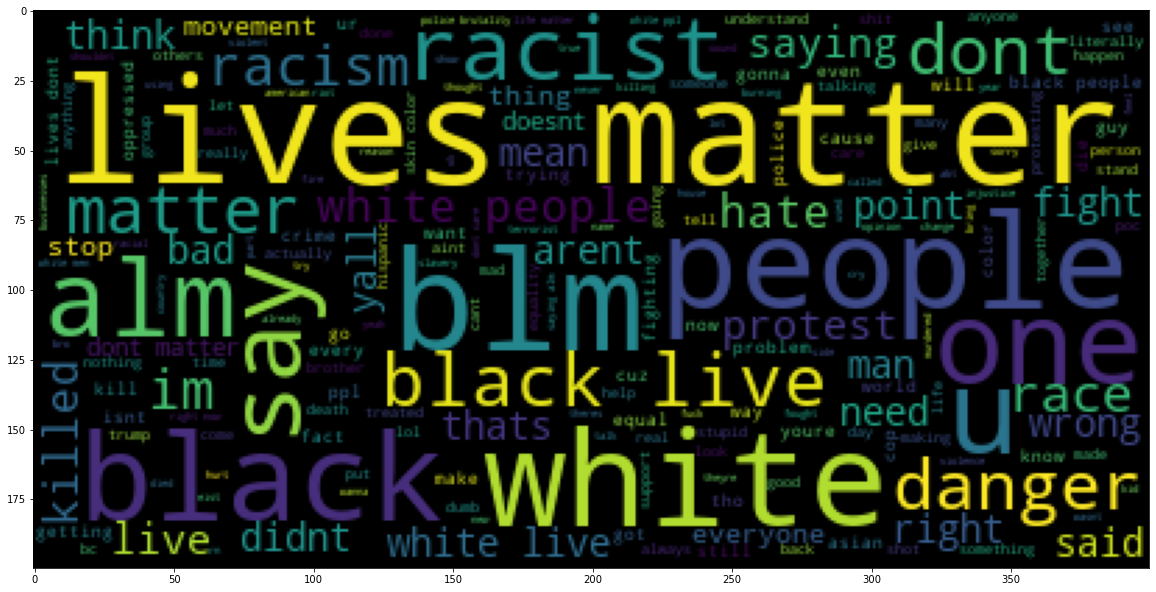

In [108]:
Negative=sentantidfs[sentantidfs['sentiment']=='Negative']
Negative_list = Negative['Comment Text'].to_list()
Negative_words=" ".join(Negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(Negative_words))

### 4.4.2. Positive WordCloud without stopwords

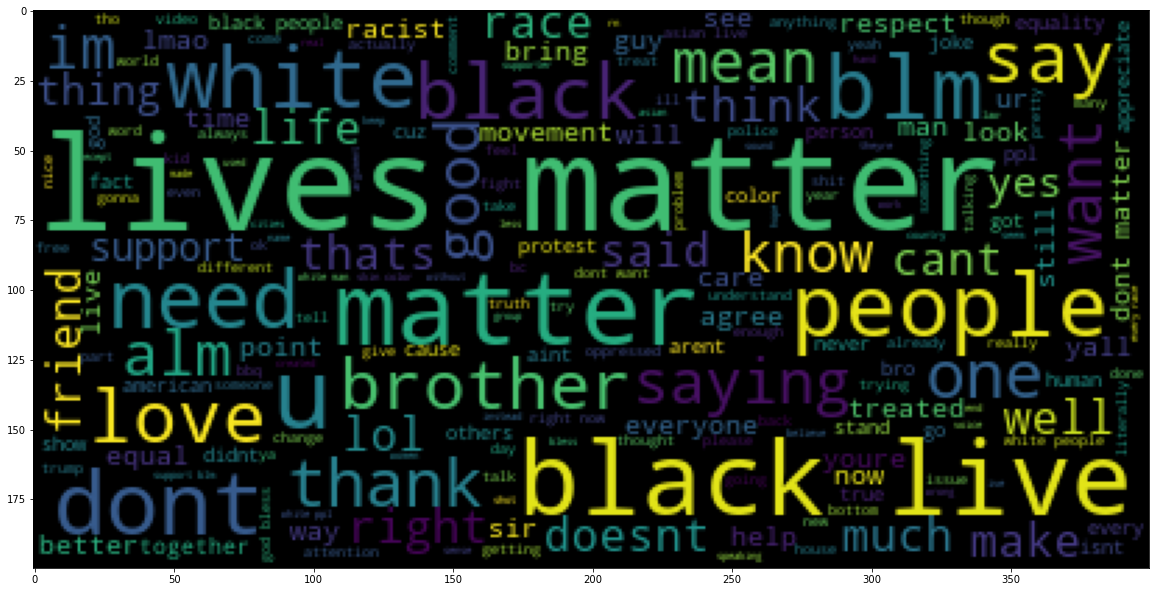

In [109]:
Positive=sentantidfs[sentantidfs['sentiment']=='Positive']
Positive_list=Positive['Comment Text'].to_list()
Positive_words=" ".join(Positive_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(Positive_words))

## 4.5. Count Vectorisation

In [110]:
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(sentantidfs['clean_comments'])

#print(vectorizer.get_feature_names())

In [111]:
y=sentantidfs['sentiment']
y.shape

(4243,)

## 4.6. TFIDF

In [112]:
tfidfanti = sentantidfs.copy()

In [113]:
conditions = [
    sentantidfs.sentiment == 'Positive',
    sentantidfs.sentiment == 'Neutral',
    sentantidfs.sentiment <= 'Negative',
]

values = [0, 1, 2]

tfidfanti['label'] = np.select(conditions, values)

In [114]:
tfidf_X_train, tfidf_X_test, tfidf_Y_train, tfidf_Y_test = train_test_split(tfidfanti['clean_comments'], tfidfanti['label'], test_size=0.25, random_state=30)
print('Train: ', tfidf_X_train.shape, tfidf_Y_train.shape, 'Test: ',(tfidf_X_test.shape, tfidf_Y_test.shape))

Train:  (3182,) (3182,) Test:  ((1061,), (1061,))


In [115]:
print('TFIDF Vectorizer……')

vectorizer= TfidfVectorizer()
tfidf_x_train = vectorizer.fit_transform(tfidf_X_train)
tfidf_x_test = vectorizer.transform(tfidf_X_test)

TFIDF Vectorizer……


## 4.7. TFIDF Support Vector Machine

### 4.7.1. Training

In [116]:
tfidfSVM_clf = LinearSVC(random_state=0)

In [117]:
tfidfSVM_clf.fit(tfidf_x_train,tfidf_Y_train)

LinearSVC(random_state=0)

In [118]:
tfidfSVM_y_test_pred=tfidfSVM_clf.predict(tfidf_x_test)

In [119]:
tfidfSVM_report=classification_report(tfidf_Y_test, tfidfSVM_y_test_pred, output_dict=True)

In [120]:
tfidfSVM_cm = confusion_matrix(tfidf_Y_test, tfidfSVM_y_test_pred)

Text(33.0, 0.5, 'Data')

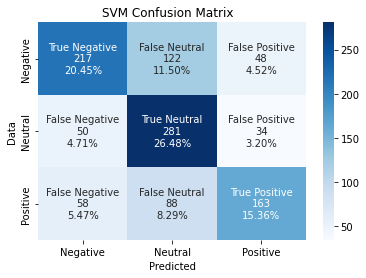

In [121]:
group_names = ["True Negative","False Neutral","False Positive","False Negative","True Neutral","False Positive","False Negative","False Neutral","True Positive"]

group_counts = ["{0:0.0f}".format(value) for value in
                tfidfSVM_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     tfidfSVM_cm.flatten()/np.sum(tfidfSVM_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
ax= plt.subplot()
ax.set_title('SVM Confusion Matrix  ');
sns.heatmap(tfidfSVM_cm, annot=labels,ax=ax, fmt='', cmap='Blues')

ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive']); ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive']);

plt.xlabel('Predicted')
plt.ylabel('Data')

In [122]:
target_names=['Negative','Neutral' ,'Positive']
tfidfSVM_Classification_report = classification_report(tfidf_Y_test, tfidfSVM_y_test_pred, target_names=target_names)

print(tfidfSVM_Classification_report)

              precision    recall  f1-score   support

    Negative       0.67      0.56      0.61       387
     Neutral       0.57      0.77      0.66       365
    Positive       0.67      0.53      0.59       309

    accuracy                           0.62      1061
   macro avg       0.64      0.62      0.62      1061
weighted avg       0.63      0.62      0.62      1061



In [123]:
tfidfSVM_accuracy = (accuracy_score(tfidf_Y_test,tfidfSVM_y_test_pred)*100)

In [124]:
print('ACCURACY',int(round(accuracy_score(tfidf_Y_test,tfidfSVM_y_test_pred)*100)),'%')


ACCURACY 62 %


### 4.7.1. Anti Data Set ML

In [125]:
X = tfidfanti['clean_comments']

In [126]:
y = tfidfanti['label']

In [127]:
vectorizer.fit(X)
x = vectorizer.transform(X)

In [128]:
tfidfSVM_clf = LinearSVC(random_state=0)

In [129]:
tfidfSVM_clf.fit(x, y)

LinearSVC(random_state=0)

In [130]:
tfidfSVM_y_pred = tfidfSVM_clf.predict(x)

In [131]:
len(tfidfSVM_y_pred)

4243

In [132]:
tfidfSVM_y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [133]:
tfidfanti['sent_2'] = tfidfSVM_y_pred

In [150]:
antiBLMdf = tfidfanti[['sentiment', 'sent_2']]

## 4.8. Data Analysis

In [151]:
antiBLMdf.dropna()

,sentiment,sent_2
0,Positive,1
1,Negative,1
2,Negative,1
3,Neutral,1
4,Positive,0
...,...,...
4238,Positive,0
4239,Positive,0
4240,Positive,0
4241,Positive,0


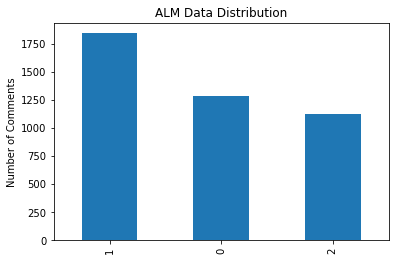

In [152]:
antiBLMdf['sent_2'].value_counts().plot(kind='bar')
plt.ylabel('Number of Comments')
plt.title('ALM Data Distribution')
plt.show()

In [137]:
antiBLMdf['sent_2'].value_counts()

1    1841
0    1282
2    1120
Name: sent_2, dtype: int64

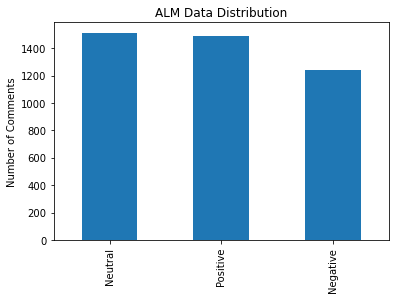

In [138]:
antiBLMdf['sentiment'].value_counts().plot(kind='bar')
plt.ylabel('Number of Comments')
plt.title('ALM Data Distribution')
plt.show()

In [153]:
antiBLMdf['sentiment'].value_counts()

Neutral     1512
Positive    1489
Negative    1242
Name: sentiment, dtype: int64

In [140]:
sum(fullprodfs['Number of Replies'])

1010

In [154]:
proBLMdf.to_csv('proBLM.csv', index=False)

In [155]:
antiBLMdf.to_csv('antiBLM.csv', index=False)

# 5. Hypothesis Testing

## 5.1. Pro-BLM Data

In [143]:
table = [[794, 2253,  334], [3381, 3381, 3381]]
stat, p, dof, expected = chi2_contingency(table)
print('X-squared = %.2f, df = %d, p-value = %.5f' % (stat, dof, p))

X-squared = 1262.62, df = 2, p-value = 0.00000


In [144]:
count = np.array([794, 334])
nobs = np.array([1128, 1128])
stat, pval = proportions_ztest(count, nobs, alternative='larger')
print('stat=%.3f, p=%.3f' % (stat, pval))

stat=19.369, p=0.000


## 5.2. Anti-BLM Data

In [145]:
table = [[1282, 1841,  1120], [4243, 4243, 4243]]
stat, p, dof, expected = chi2_contingency(table)
print('X-squared = %.2f, df = %d, p-value = %.5f' % (stat, dof, p))

X-squared = 147.74, df = 2, p-value = 0.00000


In [146]:
count = np.array([1282, 1120])
nobs = np.array([2402, 2402])
stat, pval = proportions_ztest(count, nobs, alternative='larger')
print('stat=%.3f, p=%.3f' % (stat, pval))

stat=4.675, p=0.000


## 5.3. All Data

In [147]:
table = [[2076, 4094,  1454], [7624, 7624, 7624]]
stat, p, dof, expected = chi2_contingency(table)
print('X-squared = %.2f, df = %d, p-value = %.5f' % (stat, dof, p))

X-squared = 1074.88, df = 2, p-value = 0.00000


In [148]:
count = np.array([2076, 1454])
nobs = np.array([3530, 3530])
stat, pval = proportions_ztest(count, nobs, alternative='larger')
print('stat=%.3f, p=%.3f' % (stat, pval))

stat=14.805, p=0.000
